In [ ]:
## Imports
import torch
import torchvision.transforms as transforms
from torchvision.transforms import InterpolationMode
import torchvision.transforms.functional as F
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt

## Data Augmentation with one input image

In [ ]:
# Data Augmentation Techniques Used in DeiT
class DeiTAugmentations:
    def __init__(self):
        self.basic_transforms = transforms.Compose([
            transforms.RandomResizedCrop(224, scale=(0.08, 1.0), ratio=(3/4, 4/3), interpolation=InterpolationMode.BICUBIC),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.AutoAugment(transforms.AutoAugmentPolicy.IMAGENET),
            transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

    def random_erasing(self, img):
        eraser = transforms.RandomErasing(p=0.25, scale=(0.02, 0.33), ratio=(0.3, 3.3), value='random')
        return eraser(img)

    def mixup(self, img1, img2, alpha=0.2):
        lam = np.random.beta(alpha, alpha)
        mixed_img = lam * img1 + (1 - lam) * img2
        return mixed_img

    def cutmix(self, img1, img2, alpha=1.0):
        lam = np.random.beta(alpha, alpha)
        H, W = img1.shape[1:]
        r_x, r_y = np.random.randint(W), np.random.randint(H)
        r_w, r_h = int(W * np.sqrt(1 - lam)), int(H * np.sqrt(1 - lam))
        x1, y1 = np.clip(r_x - r_w // 2, 0, W), np.clip(r_y - r_h // 2, 0, H)
        x2, y2 = np.clip(r_x + r_w // 2, 0, W), np.clip(r_y + r_h // 2, 0, H)
        img1[:, y1:y2, x1:x2] = img2[:, y1:y2, x1:x2]
        return img1

    def apply_augmentations(self, image_path):
        image = Image.open(image_path).convert("RGB")
        image = self.basic_transforms(image)
        return image

# Function to Apply Augmentations and Display Images
def visualize_augmentations(image_path, num_samples=5):
    augmenter = DeiTAugmentations()
    image = augmenter.apply_augmentations(image_path)
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i in range(num_samples):
        augmented_image = image.clone()
        if i % 2 == 0:
            augmented_image = augmenter.random_erasing(augmented_image)
        elif i % 3 == 0:
            img2 = augmenter.apply_augmentations(image_path)
            augmented_image = augmenter.cutmix(augmented_image, img2)
        else:
            img2 = augmenter.apply_augmentations(image_path)
            augmented_image = augmenter.mixup(augmented_image, img2)

        image_np = augmented_image.permute(1, 2, 0).numpy()
        image_np = np.clip(image_np * 0.229 + 0.485, 0, 1)  # Unnormalize for visualization

        axes[i].imshow(image_np)
        axes[i].axis("off")
        axes[i].set_title(f"Augmentation {i+1}")

    plt.show()


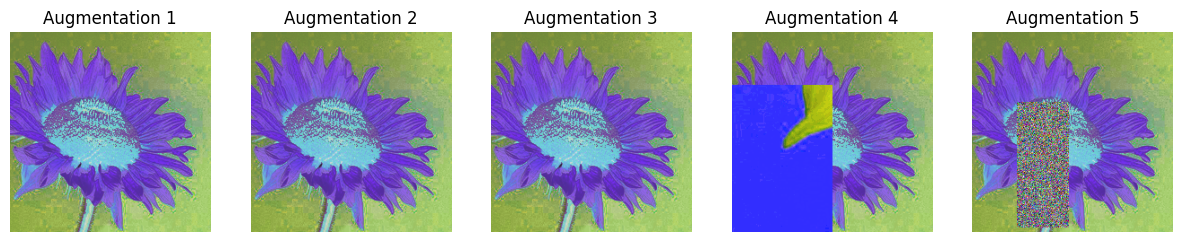

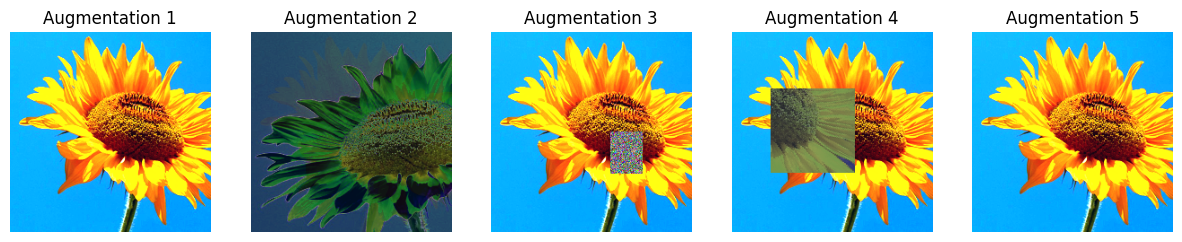

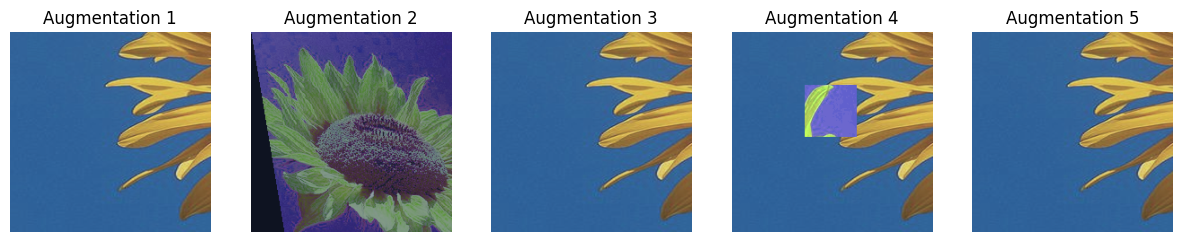

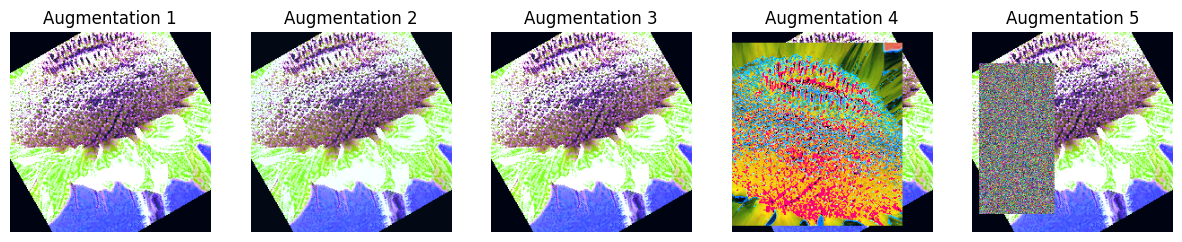

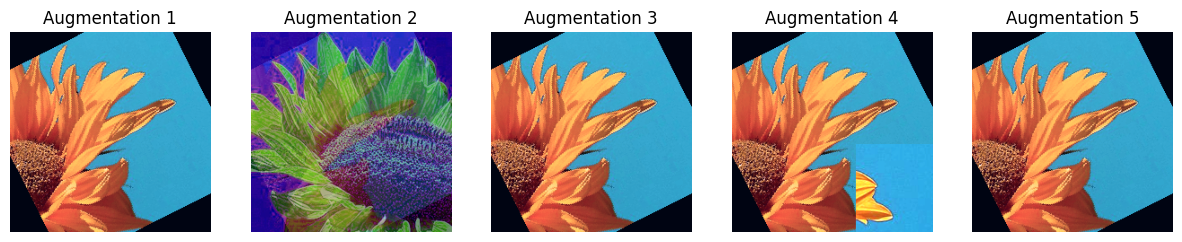

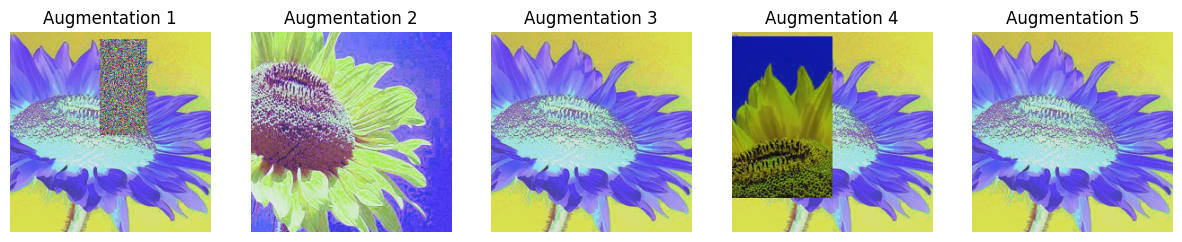

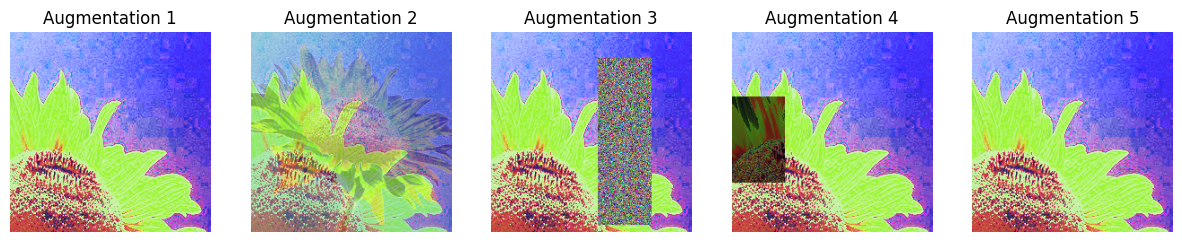

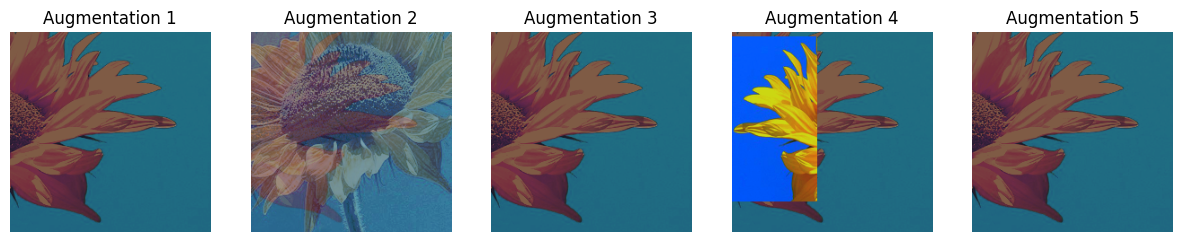

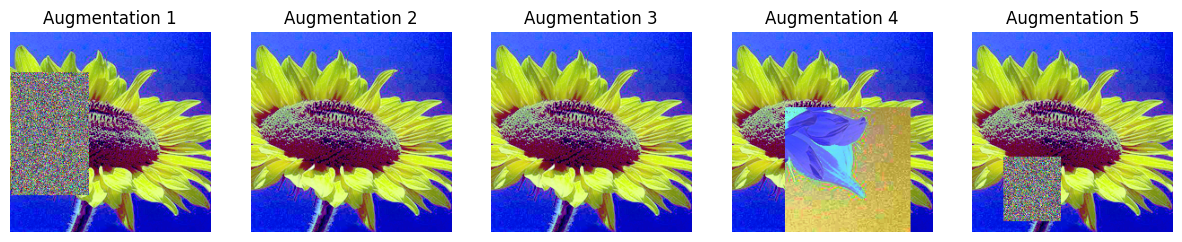

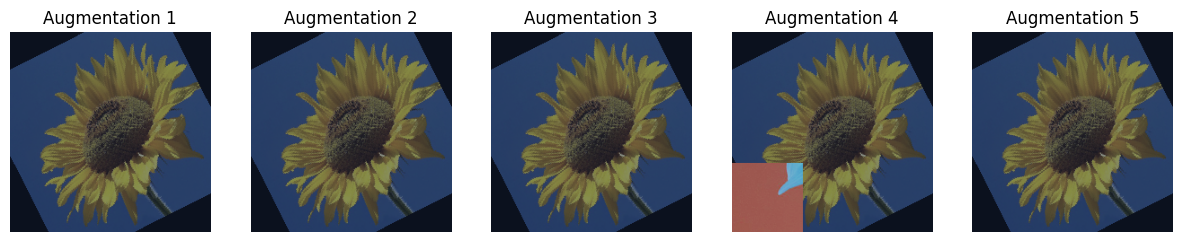

In [ ]:
## visualize
iteration = 10
for i in range(iteration):
  image_path = "/content/sample_data/flower.jpg"  # Replace with actual image file path
  visualize_augmentations(image_path)

## Data Augmentation using Two input images

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.transforms import InterpolationMode
import torchvision.transforms.functional as F
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
# Data Augmentation Techniques Used in DeiT
class DeiTAugmentations:
    def __init__(self):
        self.basic_transforms = transforms.Compose([
            transforms.RandomResizedCrop(224, scale=(0.08, 1.0), ratio=(3/4, 4/3), interpolation=InterpolationMode.BICUBIC),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.AutoAugment(transforms.AutoAugmentPolicy.IMAGENET),
            transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

    def random_erasing(self, img):
        eraser = transforms.RandomErasing(p=0.25, scale=(0.02, 0.33), ratio=(0.3, 3.3), value='random')
        return eraser(img)

    def mixup(self, img1, img2, alpha=0.2):
        lam = np.random.beta(alpha, alpha)
        mixed_img = lam * img1 + (1 - lam) * img2
        return mixed_img

    def cutmix(self, img1, img2, alpha=1.0):
        lam = np.random.beta(alpha, alpha)
        H, W = img1.shape[1:]
        r_x, r_y = np.random.randint(W), np.random.randint(H)
        r_w, r_h = int(W * np.sqrt(1 - lam)), int(H * np.sqrt(1 - lam))
        x1, y1 = np.clip(r_x - r_w // 2, 0, W), np.clip(r_y - r_h // 2, 0, H)
        x2, y2 = np.clip(r_x + r_w // 2, 0, W), np.clip(r_y + r_h // 2, 0, H)
        img1[:, y1:y2, x1:x2] = img2[:, y1:y2, x1:x2]
        return img1

    def apply_augmentations(self, image_path):
        image = Image.open(image_path).convert("RGB")
        image = self.basic_transforms(image)
        return image

# Function to Apply Augmentations and Display Images
def visualize_augmentations(image_path1, image_path2, num_samples=5):
    augmenter = DeiTAugmentations()
    image1 = augmenter.apply_augmentations(image_path1)
    image2 = augmenter.apply_augmentations(image_path2)

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i in range(num_samples):
        augmented_image = image1.clone()
        if i % 2 == 0:
            augmented_image = augmenter.random_erasing(augmented_image)
        elif i % 3 == 0:
            augmented_image = augmenter.cutmix(augmented_image, image2)
        else:
            augmented_image = augmenter.mixup(augmented_image, image2)

        image_np = augmented_image.permute(1, 2, 0).numpy()
        image_np = np.clip(image_np * 0.229 + 0.485, 0, 1)  # Unnormalize for visualization

        axes[i].imshow(image_np)
        axes[i].axis("off")
        axes[i].set_title(f"Augmentation {i+1}")

    plt.show()

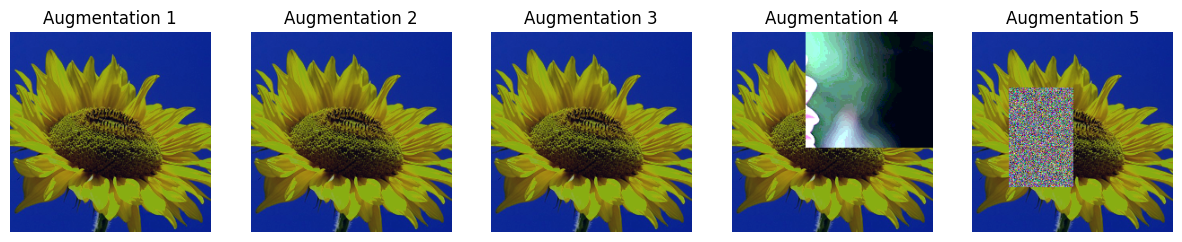

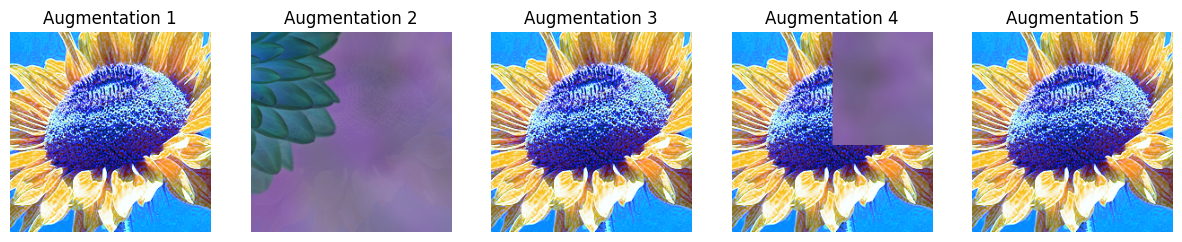

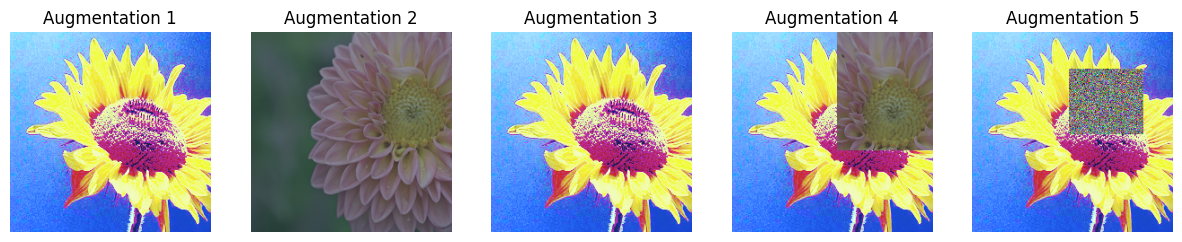

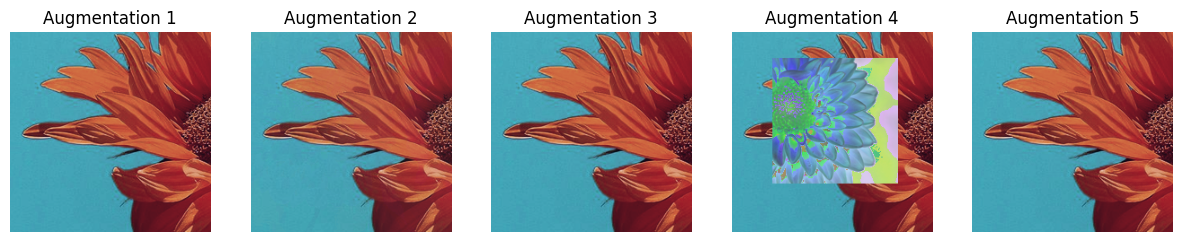

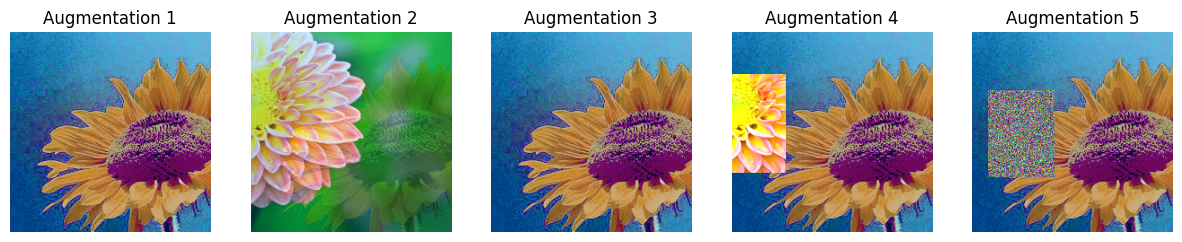

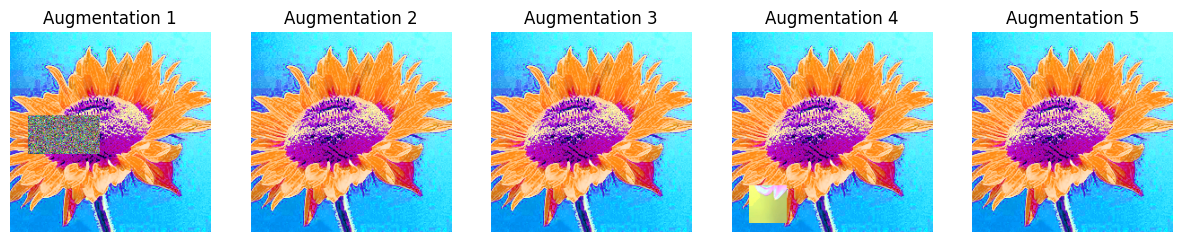

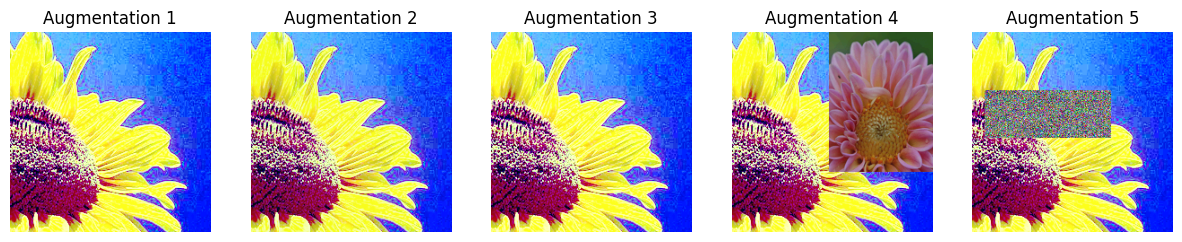

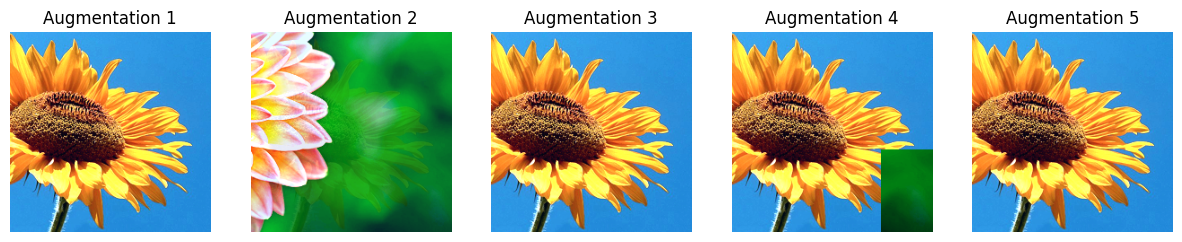

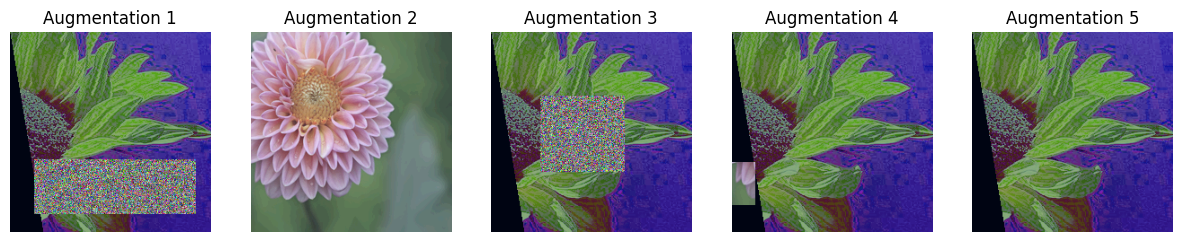

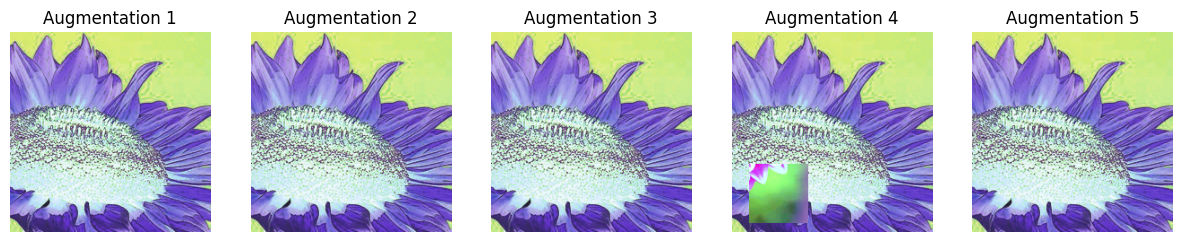

In [ ]:
## Visualization
iterations = 10
for i in range(iterations):
    image_path1 = "/content/sample_data/flower.jpg"  # Replace with actual image file path
    image_path2 = "/content/sample_data/flower2.jpg"  # Replace with another image file path
    visualize_augmentations(image_path1, image_path2)